# COGS 118A- Project Checkpoint

# Names

- Yash Potdar
- Maitrayee Keskar
- Gauri Samith
- Kyra Hulse

# Abstract 
In this project, our goal is to accurately classify and segment objects within an image. This is a common problem in computer vision, as self-driving cars need to segment objects in their visual field in order to drive, or in AR surgery, where cameras must identify and classify organs. We will be using Microsoft’s Common Objects in Context (COCO) dataset, which contains around 330,000 images with 91 objects commonly seen in everyday life. We will be implementing image segmentation using a region-based CNN (R-CNN). The R-CNN algorithm generates various region proposals, computes features, and subsequently classifies regions. In order to measure success, we will use the Jaccard Index, also known as the Intersection over Union (IoU) metric, which compares the ratio of the intersection area and union area between the targeted and predicted segmentation. We aim to use the pre-trained Mask R-CNN as a baseline model and will gauge our model’s performance by comparing their evaluation metrics to the baseline.

# Background

Object classification is very important for many everyday tasks, such as self driving, and AR surgery improvements. Previous work has had great accuracy classifying images, however, these are often iconic images, in the same orientation, with little background distractions <a name="lin"></a>[<sup>[1]</sup>](#lin). Additionally, great work has been done creating bounding boxes around objects, however, segmentation is much more useful than bounding boxes, as it shows exactly where in the image the object is, rather than just the general area <a name="lin"></a>[<sup>[1]</sup>](#lin). 

Some of the models for Instance segmentation include U-Net, Mask R-CNN, FastFCN, Gated-SCNN, DeepLab, etc. These models are built for different use cases. The U-Net model upon visualization, looks like the letter U <a name="mwiti"></a>[<sup>[2]</sup>](#mwiti). The left part of the architecture is the contractive part to capture context and the right part is called the expansive part for better localization <a name="mwiti"></a>[<sup>[2]</sup>](#mwiti). The Mask R-CNN model is trained on the COCO dataset and the model classifies every pixel into a particular class <a name="mwiti"></a>[<sup>[2]</sup>](#mwiti). Every region of interest gets a segmentation mask <a name="mwiti"></a>[<sup>[2]</sup>](#mwiti). 

There has been a lot of research involving the development of new techniques for the task of image segmentation. Some of these works include OCR (Object-Contextual Representations), FCN, etc. In the case of OCR, the task is divided into three parts where the image is first coarsely divided into the object classes using ResNet or HRNet <a name="yuan"></a>[<sup>[3]</sup>](#yuan). After that, the representation for each object is estimated by aggregating the representations of the pixels in the corresponding object regions <a name="yuan"></a>[<sup>[3]</sup>](#yuan). This is followed by the augmentation of the pixels with OCR <a name="yuan"></a>[<sup>[3]</sup>](#yuan).  

In terms of identifying objects and placing bounding boxes around them, there have been models like CornerNet and CenterNet. The CornerNet model predicts two corners (top left and bottom right) of the object and then uses them to place bounding boxes around the object in the image <a name="law"></a>[<sup>[3]</sup>](#law). The CenterNet model detects the centers of the objects and then regresses to the object key points, if any <a name="zhou"></a>[<sup>[5]</sup>](#zhou). It predicts an offset for the center of the object to better capture it and then also predicts the width and height of the bounding box for the object <a name="zhou"></a>[<sup>[5]</sup>](#zhou). Using these predictions, the model forms the bounding boxes around the detected object <a name="zhou"></a>[<sup>[5]</sup>](#zhou).

# Problem Statement

There are many situations where machines need to identify different objects in a scene. For example, self-driving cars need to identify street signs and pedestrians, while AR surgery cameras need to identify nerves and organs. Therefore, we need machines to identify each object with a definable boundary (“things” as opposed to “stuff” with ambiguous boundaries such as the sky or ground), classify each object category, and segment each instance of each object (or determine which pixels are part of each object). This task is quantifiable - we have a classification and boundary detection task - measurable - accuracy in both classification and segmentation - and replicable - any scene in everyday life has objects that can be identified and their boundaries determined.

We'll be honing in on object categories that are most relevant for autonomous driving. From the 91 object labels, we will reduce these to labels that are relevant to driving. During EDA, we will plot the distribution of occurrences for each object category and use these results to further reduce this to include the top categories. The dataset would be large enough to use validation sets to determine the hyperparameters within a model and test sets to compare models.

# Data

We will be utilizing [Microsoft’s Common Objects in Context (COCO)](https://cocodataset.org/#overview) dataset to accomplish this image segmentation and classification task <a name="coco"></a>[<sup>[6]</sup>](#coconote). We selected this dataset because it is a large-scale dataset that is used in computer vision applications and can be used to determine which models can best classify and segment objects. This dataset also contains objects in context. For example, these images are more realistic and less lab-controlled because they are taken in a natural setting, where there are generally multiple types of objects in a single image. For example, in [image 423349](https://cocodataset.org/#explore?id=423349) in COCO, there are people, a large clock, and a stop sign.

The dataset contains 91 common object labels, such as ‘person’, ‘car’, ‘traffic light’, ‘cow’, and ‘bottle’. In the dataset, there are around 330,000 images with 2.5 million labeled objects. In our segmentation task, we aim to determine the objects within the image and create a boundary for that object within the image. Therefore, each image we test on will likely have multiple objects being classified.

One concern we must address is the unbalanced classes. As seen in this [tutorial](https://blog.roboflow.com/coco-dataset/)<a name="solawetz"></a>[<sup>[7]</sup>](#solawetznote) about COCO, there are some overrepresented classes such as “person”, “car”, and “chair”, while there are several underrepresented classes like “cat”, “laptop”, and “refrigerator”. Although the classifier may work well when identifying the overrepresented or aptly represented objects, the data imbalance could lead to issues when segmenting and classifying the underrepresented objects. We will need to specially handle this data by undersampling the majority class or oversampling the minority class. 

# Proposed Solution

For the purpose of solving an image classification and detection task, machine learning and deep learning algorithms are a very common route. Given that we require the machine to clearly set a boundary and identify the class/category of the object, supervised learning lets the model know the correct classes and their associated feature distributions in advance. Convolutional Neural Networks (CNNs) are a useful approach as they take in input images, assign importance (as learn weights and biases) to different objects in the image and differentiate between different images based on feature distributions for each class of objects. 


Unlike classification, object detection presents a variable output layer based on the number of occurrences of the objects of interest in the input. The model would need to sweep different regions of different sizes in the image in order to detect and draw bounding boxes around the required objects. We plan to use a Region-based CNN (R-CNN) which generates a few thousand region proposals using the Selective Search Algorithm. These regions are combined together in a matrix, fed into a CNN to extract features, and then passed on to an SVM which classifies the objects. 


There were several implementations of the R-CNN that are available to test out including but not limited to Mask R-CNN, FRCNN, etc. We are choosing to begin with a pre-trained Mask R-CNN, which was trained on the COCO dataset. Apart from just a bounding box, the model creates an additional mask around the detected object in order to increase classification accuracy by segmentation. After evaluating the performance of this model using IOU and F1 score, we will set it as our baseline standard. We will further explain these metrics in the Evaluation Metric section of the proposal. Moving forward, we had three different paths depending on the evaluation results:

* Add to model depth (additional layers)
* Perform additional feature engineering/extract a different kind of feature
* Choose a different model (e.g Fast FCN) and compare performance

# Evaluation Metrics
For the task of Image Segmentation, some of the evaluation metrics commonly used are the Pixel accuracy metric, the Intersection over Union (IoU), and the Dice Co-efficient(F1-Score). The Pixel accuracy metric calculates the percentage of correctly classified pixels in the image. The problem with this metric is that when there is a class imbalance in the image, the metric gives a high accuracy, but in reality, the segmentation may have failed to cover some of the imaportant classes. 

To make this more robust, we use the Intersection over Union metric which divides the area of overlap between the target and the predicted segmentation by the area of union of the target and predicted segmentation. This makes the metric more robust against class imbalance. If the predicted segmentation covers the target segmentation but is bigger than the target area, then, the accuracy will be penalized by the denominator. The metric will give a high accuracy when the predicted segment is comparable in size with the target segment and also overlaps considerably with the target segment. This metric is also often used in literature. We will use this metric as our evaluation metric. 

# Preliminary results

# Exploratory Data Analysis (EDA)

In [2]:
import pycocotools.coco as coco
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [3]:
anot_path = "coco-2017/raw/instances_train2017.json"
image_folder = "coco-2017/train/data"

In [4]:
with open(anot_path, 'r') as file:
    data = json.load(file)
    annotations = data['annotations']
    cat_ids = [1,2,3,4,6,7,8,10,11,13,14,17,18]
    counts = {}
    for ann in annotations:
        if ann['category_id'] in cat_ids:
            if ann['category_id'] in counts.keys():
                counts[ann['category_id']] += 1
            else:
                counts[ann['category_id']] = 1

In [5]:
cat_names = ['person','bicycle','car','motorcycle','bus','train','truck','traffic light','fire hydrant','stop sign','parking meter','cat','dog']
xs = []
for id in cat_ids:
    xs.append(counts[id])

In [6]:
xs

[262465,
 7113,
 43867,
 8725,
 6069,
 4571,
 9973,
 12884,
 1865,
 1983,
 1285,
 4768,
 5508]

<BarContainer object of 13 artists>

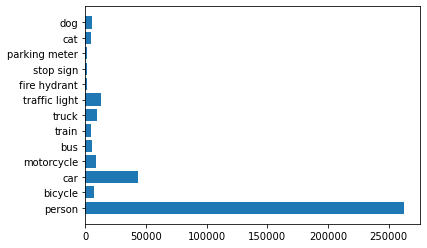

In [8]:
plt.barh(y=cat_names, width=xs)

In [9]:
xs_without_person = xs[1:]
cat_names_without_person = cat_names[1:]

<BarContainer object of 12 artists>

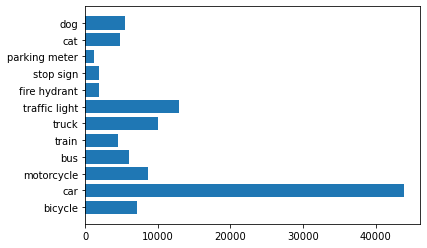

In [10]:
plt.barh(y=cat_names_without_person, width=xs_without_person)

# Visualizing images

In [11]:
my_coco = coco.COCO(anot_path)
my_imgs = my_coco.getImgIds()

loading annotations into memory...
Done (t=17.07s)
creating index...
index created!


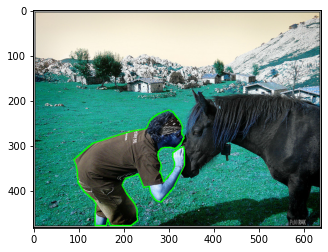

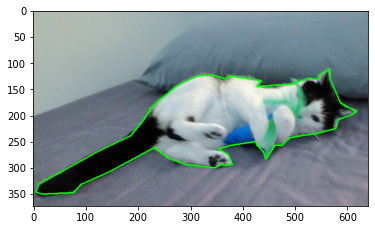

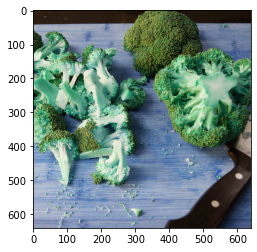

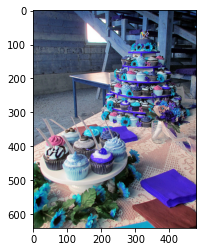

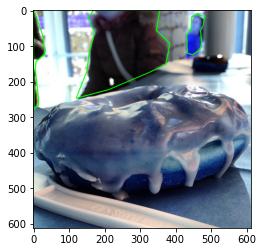

In [12]:
indices = np.random.choice(range(len(my_imgs)), 5)
for index in indices:
    img_id = my_imgs[index]
    file_name = my_coco.loadImgs(img_id)[0]['file_name']
    ann_ids = my_coco.getAnnIds([img_id])
    annotations = my_coco.loadAnns(ann_ids)
    
    img_path = os.path.join(image_folder, file_name)
    image = cv2.imread(img_path)
    
    for ann in annotations:
        if ann['category_id'] in cat_ids:
            segs = np.array(ann['segmentation'][0]).reshape(-1, 2).astype(int)
            for i in range(1, segs.shape[0]):
                cv2.line(image, segs[i-1], segs[i], (0, 255, 0), 2)
            cv2.line(image, segs[-1], segs[0], (0, 255, 0), 2)
    plt.imshow(image)
    plt.show()

# Histogram for number of segments for top 3 categories

In [13]:
indices = np.random.choice(range(len(my_imgs)), 5000)
segs_dict = {}
corr_ids = [1, 3, 10]
count = 1
for index in indices:
    img_id = my_imgs[index]
    file_name = my_coco.loadImgs(img_id)[0]['file_name']
    ann_ids = my_coco.getAnnIds([img_id])
    annotations = my_coco.loadAnns(ann_ids)
    
    img_path = os.path.join(image_folder, file_name)
    image = cv2.imread(img_path)
    
    for ann in annotations:
        if ann['category_id'] in corr_ids:
            if ann['iscrowd'] == 0:
                segs = np.array(ann['segmentation'][0]).reshape(-1, 2).astype(int)
                num_edges = segs.shape[0]-1
                if ann['category_id'] in segs_dict.keys():
                    segs_dict[ann['category_id']].append(num_edges)
                else:
                    segs_dict[ann['category_id']] = [num_edges]
    print(f"Done with image: {count}")
    count += 1

Done with image: 1
Done with image: 2
Done with image: 3
Done with image: 4
Done with image: 5
Done with image: 6
Done with image: 7
Done with image: 8
Done with image: 9
Done with image: 10
Done with image: 11
Done with image: 12
Done with image: 13
Done with image: 14
Done with image: 15
Done with image: 16
Done with image: 17
Done with image: 18
Done with image: 19
Done with image: 20
Done with image: 21
Done with image: 22
Done with image: 23
Done with image: 24
Done with image: 25
Done with image: 26
Done with image: 27
Done with image: 28
Done with image: 29
Done with image: 30
Done with image: 31
Done with image: 32
Done with image: 33
Done with image: 34
Done with image: 35
Done with image: 36
Done with image: 37
Done with image: 38
Done with image: 39
Done with image: 40
Done with image: 41
Done with image: 42
Done with image: 43
Done with image: 44
Done with image: 45
Done with image: 46
Done with image: 47
Done with image: 48
Done with image: 49
Done with image: 50
Done with

Done with image: 413
Done with image: 414
Done with image: 415
Done with image: 416
Done with image: 417
Done with image: 418
Done with image: 419
Done with image: 420
Done with image: 421
Done with image: 422
Done with image: 423
Done with image: 424
Done with image: 425
Done with image: 426
Done with image: 427
Done with image: 428
Done with image: 429
Done with image: 430
Done with image: 431
Done with image: 432
Done with image: 433
Done with image: 434
Done with image: 435
Done with image: 436
Done with image: 437
Done with image: 438
Done with image: 439
Done with image: 440
Done with image: 441
Done with image: 442
Done with image: 443
Done with image: 444
Done with image: 445
Done with image: 446
Done with image: 447
Done with image: 448
Done with image: 449
Done with image: 450
Done with image: 451
Done with image: 452
Done with image: 453
Done with image: 454
Done with image: 455
Done with image: 456
Done with image: 457
Done with image: 458
Done with image: 459
Done with ima

Done with image: 828
Done with image: 829
Done with image: 830
Done with image: 831
Done with image: 832
Done with image: 833
Done with image: 834
Done with image: 835
Done with image: 836
Done with image: 837
Done with image: 838
Done with image: 839
Done with image: 840
Done with image: 841
Done with image: 842
Done with image: 843
Done with image: 844
Done with image: 845
Done with image: 846
Done with image: 847
Done with image: 848
Done with image: 849
Done with image: 850
Done with image: 851
Done with image: 852
Done with image: 853
Done with image: 854
Done with image: 855
Done with image: 856
Done with image: 857
Done with image: 858
Done with image: 859
Done with image: 860
Done with image: 861
Done with image: 862
Done with image: 863
Done with image: 864
Done with image: 865
Done with image: 866
Done with image: 867
Done with image: 868
Done with image: 869
Done with image: 870
Done with image: 871
Done with image: 872
Done with image: 873
Done with image: 874
Done with ima

Done with image: 1216
Done with image: 1217
Done with image: 1218
Done with image: 1219
Done with image: 1220
Done with image: 1221
Done with image: 1222
Done with image: 1223
Done with image: 1224
Done with image: 1225
Done with image: 1226
Done with image: 1227
Done with image: 1228
Done with image: 1229
Done with image: 1230
Done with image: 1231
Done with image: 1232
Done with image: 1233
Done with image: 1234
Done with image: 1235
Done with image: 1236
Done with image: 1237
Done with image: 1238
Done with image: 1239
Done with image: 1240
Done with image: 1241
Done with image: 1242
Done with image: 1243
Done with image: 1244
Done with image: 1245
Done with image: 1246
Done with image: 1247
Done with image: 1248
Done with image: 1249
Done with image: 1250
Done with image: 1251
Done with image: 1252
Done with image: 1253
Done with image: 1254
Done with image: 1255
Done with image: 1256
Done with image: 1257
Done with image: 1258
Done with image: 1259
Done with image: 1260
Done with 

Done with image: 1596
Done with image: 1597
Done with image: 1598
Done with image: 1599
Done with image: 1600
Done with image: 1601
Done with image: 1602
Done with image: 1603
Done with image: 1604
Done with image: 1605
Done with image: 1606
Done with image: 1607
Done with image: 1608
Done with image: 1609
Done with image: 1610
Done with image: 1611
Done with image: 1612
Done with image: 1613
Done with image: 1614
Done with image: 1615
Done with image: 1616
Done with image: 1617
Done with image: 1618
Done with image: 1619
Done with image: 1620
Done with image: 1621
Done with image: 1622
Done with image: 1623
Done with image: 1624
Done with image: 1625
Done with image: 1626
Done with image: 1627
Done with image: 1628
Done with image: 1629
Done with image: 1630
Done with image: 1631
Done with image: 1632
Done with image: 1633
Done with image: 1634
Done with image: 1635
Done with image: 1636
Done with image: 1637
Done with image: 1638
Done with image: 1639
Done with image: 1640
Done with 

Done with image: 1983
Done with image: 1984
Done with image: 1985
Done with image: 1986
Done with image: 1987
Done with image: 1988
Done with image: 1989
Done with image: 1990
Done with image: 1991
Done with image: 1992
Done with image: 1993
Done with image: 1994
Done with image: 1995
Done with image: 1996
Done with image: 1997
Done with image: 1998
Done with image: 1999
Done with image: 2000
Done with image: 2001
Done with image: 2002
Done with image: 2003
Done with image: 2004
Done with image: 2005
Done with image: 2006
Done with image: 2007
Done with image: 2008
Done with image: 2009
Done with image: 2010
Done with image: 2011
Done with image: 2012
Done with image: 2013
Done with image: 2014
Done with image: 2015
Done with image: 2016
Done with image: 2017
Done with image: 2018
Done with image: 2019
Done with image: 2020
Done with image: 2021
Done with image: 2022
Done with image: 2023
Done with image: 2024
Done with image: 2025
Done with image: 2026
Done with image: 2027
Done with 

Done with image: 2366
Done with image: 2367
Done with image: 2368
Done with image: 2369
Done with image: 2370
Done with image: 2371
Done with image: 2372
Done with image: 2373
Done with image: 2374
Done with image: 2375
Done with image: 2376
Done with image: 2377
Done with image: 2378
Done with image: 2379
Done with image: 2380
Done with image: 2381
Done with image: 2382
Done with image: 2383
Done with image: 2384
Done with image: 2385
Done with image: 2386
Done with image: 2387
Done with image: 2388
Done with image: 2389
Done with image: 2390
Done with image: 2391
Done with image: 2392
Done with image: 2393
Done with image: 2394
Done with image: 2395
Done with image: 2396
Done with image: 2397
Done with image: 2398
Done with image: 2399
Done with image: 2400
Done with image: 2401
Done with image: 2402
Done with image: 2403
Done with image: 2404
Done with image: 2405
Done with image: 2406
Done with image: 2407
Done with image: 2408
Done with image: 2409
Done with image: 2410
Done with 

Done with image: 2743
Done with image: 2744
Done with image: 2745
Done with image: 2746
Done with image: 2747
Done with image: 2748
Done with image: 2749
Done with image: 2750
Done with image: 2751
Done with image: 2752
Done with image: 2753
Done with image: 2754
Done with image: 2755
Done with image: 2756
Done with image: 2757
Done with image: 2758
Done with image: 2759
Done with image: 2760
Done with image: 2761
Done with image: 2762
Done with image: 2763
Done with image: 2764
Done with image: 2765
Done with image: 2766
Done with image: 2767
Done with image: 2768
Done with image: 2769
Done with image: 2770
Done with image: 2771
Done with image: 2772
Done with image: 2773
Done with image: 2774
Done with image: 2775
Done with image: 2776
Done with image: 2777
Done with image: 2778
Done with image: 2779
Done with image: 2780
Done with image: 2781
Done with image: 2782
Done with image: 2783
Done with image: 2784
Done with image: 2785
Done with image: 2786
Done with image: 2787
Done with 

Done with image: 3117
Done with image: 3118
Done with image: 3119
Done with image: 3120
Done with image: 3121
Done with image: 3122
Done with image: 3123
Done with image: 3124
Done with image: 3125
Done with image: 3126
Done with image: 3127
Done with image: 3128
Done with image: 3129
Done with image: 3130
Done with image: 3131
Done with image: 3132
Done with image: 3133
Done with image: 3134
Done with image: 3135
Done with image: 3136
Done with image: 3137
Done with image: 3138
Done with image: 3139
Done with image: 3140
Done with image: 3141
Done with image: 3142
Done with image: 3143
Done with image: 3144
Done with image: 3145
Done with image: 3146
Done with image: 3147
Done with image: 3148
Done with image: 3149
Done with image: 3150
Done with image: 3151
Done with image: 3152
Done with image: 3153
Done with image: 3154
Done with image: 3155
Done with image: 3156
Done with image: 3157
Done with image: 3158
Done with image: 3159
Done with image: 3160
Done with image: 3161
Done with 

Done with image: 3505
Done with image: 3506
Done with image: 3507
Done with image: 3508
Done with image: 3509
Done with image: 3510
Done with image: 3511
Done with image: 3512
Done with image: 3513
Done with image: 3514
Done with image: 3515
Done with image: 3516
Done with image: 3517
Done with image: 3518
Done with image: 3519
Done with image: 3520
Done with image: 3521
Done with image: 3522
Done with image: 3523
Done with image: 3524
Done with image: 3525
Done with image: 3526
Done with image: 3527
Done with image: 3528
Done with image: 3529
Done with image: 3530
Done with image: 3531
Done with image: 3532
Done with image: 3533
Done with image: 3534
Done with image: 3535
Done with image: 3536
Done with image: 3537
Done with image: 3538
Done with image: 3539
Done with image: 3540
Done with image: 3541
Done with image: 3542
Done with image: 3543
Done with image: 3544
Done with image: 3545
Done with image: 3546
Done with image: 3547
Done with image: 3548
Done with image: 3549
Done with 

Done with image: 3889
Done with image: 3890
Done with image: 3891
Done with image: 3892
Done with image: 3893
Done with image: 3894
Done with image: 3895
Done with image: 3896
Done with image: 3897
Done with image: 3898
Done with image: 3899
Done with image: 3900
Done with image: 3901
Done with image: 3902
Done with image: 3903
Done with image: 3904
Done with image: 3905
Done with image: 3906
Done with image: 3907
Done with image: 3908
Done with image: 3909
Done with image: 3910
Done with image: 3911
Done with image: 3912
Done with image: 3913
Done with image: 3914
Done with image: 3915
Done with image: 3916
Done with image: 3917
Done with image: 3918
Done with image: 3919
Done with image: 3920
Done with image: 3921
Done with image: 3922
Done with image: 3923
Done with image: 3924
Done with image: 3925
Done with image: 3926
Done with image: 3927
Done with image: 3928
Done with image: 3929
Done with image: 3930
Done with image: 3931
Done with image: 3932
Done with image: 3933
Done with 

Done with image: 4275
Done with image: 4276
Done with image: 4277
Done with image: 4278
Done with image: 4279
Done with image: 4280
Done with image: 4281
Done with image: 4282
Done with image: 4283
Done with image: 4284
Done with image: 4285
Done with image: 4286
Done with image: 4287
Done with image: 4288
Done with image: 4289
Done with image: 4290
Done with image: 4291
Done with image: 4292
Done with image: 4293
Done with image: 4294
Done with image: 4295
Done with image: 4296
Done with image: 4297
Done with image: 4298
Done with image: 4299
Done with image: 4300
Done with image: 4301
Done with image: 4302
Done with image: 4303
Done with image: 4304
Done with image: 4305
Done with image: 4306
Done with image: 4307
Done with image: 4308
Done with image: 4309
Done with image: 4310
Done with image: 4311
Done with image: 4312
Done with image: 4313
Done with image: 4314
Done with image: 4315
Done with image: 4316
Done with image: 4317
Done with image: 4318
Done with image: 4319
Done with 

Done with image: 4657
Done with image: 4658
Done with image: 4659
Done with image: 4660
Done with image: 4661
Done with image: 4662
Done with image: 4663
Done with image: 4664
Done with image: 4665
Done with image: 4666
Done with image: 4667
Done with image: 4668
Done with image: 4669
Done with image: 4670
Done with image: 4671
Done with image: 4672
Done with image: 4673
Done with image: 4674
Done with image: 4675
Done with image: 4676
Done with image: 4677
Done with image: 4678
Done with image: 4679
Done with image: 4680
Done with image: 4681
Done with image: 4682
Done with image: 4683
Done with image: 4684
Done with image: 4685
Done with image: 4686
Done with image: 4687
Done with image: 4688
Done with image: 4689
Done with image: 4690
Done with image: 4691
Done with image: 4692
Done with image: 4693
Done with image: 4694
Done with image: 4695
Done with image: 4696
Done with image: 4697
Done with image: 4698
Done with image: 4699
Done with image: 4700
Done with image: 4701
Done with 

In [15]:
segs_dict.keys()

dict_keys([1, 3, 10])

In [16]:
segs_dict[1]

[34,
 76,
 17,
 22,
 57,
 32,
 46,
 9,
 9,
 14,
 25,
 32,
 47,
 18,
 14,
 9,
 9,
 7,
 62,
 24,
 36,
 31,
 31,
 40,
 30,
 9,
 38,
 6,
 19,
 12,
 19,
 7,
 12,
 37,
 13,
 12,
 139,
 26,
 42,
 83,
 31,
 27,
 29,
 42,
 14,
 21,
 34,
 20,
 55,
 21,
 22,
 50,
 53,
 16,
 11,
 21,
 33,
 41,
 44,
 58,
 23,
 15,
 86,
 11,
 19,
 21,
 22,
 19,
 31,
 23,
 23,
 4,
 11,
 158,
 24,
 60,
 19,
 6,
 26,
 28,
 20,
 18,
 13,
 47,
 31,
 24,
 17,
 18,
 27,
 30,
 7,
 29,
 10,
 7,
 10,
 9,
 4,
 18,
 35,
 42,
 34,
 53,
 54,
 33,
 24,
 32,
 25,
 67,
 8,
 48,
 34,
 20,
 18,
 47,
 19,
 83,
 8,
 18,
 10,
 27,
 30,
 8,
 51,
 9,
 5,
 6,
 7,
 7,
 11,
 21,
 8,
 8,
 80,
 15,
 36,
 27,
 47,
 8,
 25,
 19,
 23,
 103,
 9,
 13,
 20,
 10,
 13,
 26,
 30,
 20,
 21,
 33,
 42,
 24,
 54,
 38,
 23,
 54,
 47,
 75,
 31,
 36,
 48,
 90,
 20,
 17,
 34,
 25,
 34,
 28,
 32,
 20,
 45,
 36,
 12,
 31,
 10,
 32,
 14,
 15,
 27,
 35,
 16,
 11,
 17,
 20,
 12,
 12,
 8,
 14,
 13,
 31,
 13,
 22,
 12,
 17,
 18,
 55,
 11,
 45,
 37,
 42,
 20,
 18,
 41,

In [20]:
len(segs_dict[10])

543

# Ethics & Privacy

One potential ethical complication comes from the success of the model. Machines being better able to identify objects in a picture enables better spying on people. This model could easily be applied to an oculus, or oculus data, which could determine what products are in someone’s house, allowing meta to directly link a consumer to which products they buy. They will then sell this information to advertisers. With more information garnered from customers, it is easier to identify consumers in the real world, and know more about them. This is a big privacy issue.

Another potential ethical issue comes from the failure of the model. This model is necessary for many life threatening tasks, such as a self-driving vehicle and surgery. If the model incorrectly identifies something in either of these tasks, it could lead to death. A car not identifying a stop sign could run a stop and cause a car crash. Surgery AR goggles not identifying a nerve could lead to a surgeon cutting the nerve and leaving the patient paralyzed. Additionally, the data is often skewed toward certain races, which makes it better at identifying disproportionately represented races and things in their cultures.

To help address these and other potential ethical issues, we will use the tool “deon.” This has a checklist of many common issues in machine learning, and we can also modify the checklist to better suit our needs.

# Team Expectations 

* Contact over Discord group chat
* Respond to messages within 24 hours
* Most work will be divided up, some will be worked on together over meetings
* Teammates are responsible to write the code asked of them and communicate if any issues arise
* Teammates are responsible to review and understand all code
* Meetings will happen at least once a week

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/20  |  12 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research; Find dataset | 
| 4/22  |  10 AM |  Read up on dataset | Draft project proposal | 
| 4/24  | 6 PM  | Edit proposal  | Submit proposal   |
| 4/27  | 12 PM  | Everyone read up on COCO dataset and API to import the code | Discuss how to import COCO dataset; Peer reviews   |
| 5/16  | 12 PM  | Everyone try to download and analyze the COCO dataset | Go over how to analyze/import COCO data alltogether; Divide work to complete checkpoint (two people complete EDA, two people work on running models)   |
| 5/20  | 12 PM  | Complete EDA (Yash, Maitrayee), Work on running models (Gauri and Kyra) | Go over EDA completed; Go over work done on running models; Work together on running models; Complete Checkpoint writeup   |
| 5/23  | 12 PM  | Get a model to run (everyone) | Go over how to get over version conflicts to run models; Discuss Analysis Plan; Divide models to run   |
| 5/27  | 12 PM  | Reed peer review feedback, Make slight model improvements (hyperparameters) | Peer reviews; Discuss success of different models, and the analysis needed to compare them   |
| 6/2  | 12 PM  | Perform analysis of all models, reflection, speak with TA | Write full project; discuss TA feedback |
| 6/7  | 12 PM  | Make minor edits to code, make minor edits to final project | Turn in Final Project |

# Footnotes
<a name="lin"></a>1.[^](#lin): Tsung-Yi Lin, Michael Maire, et. al 2014 Microsoft COCO: Common Objects in Context. https://arxiv.org/abs/1405.0312<br> 
<a name="mwiti"></a>2.[^](#mwiti): Derrick Mwiti, Katherine (Yi) Li (5 April 2022) Image Segmentation in 2022: Architectures, Losses, Datasets, and Frameworks https://neptune.ai/blog/image-segmentation<br>
<a name="yuan"></a>3.[^](#yuan): Yuhui Yuan, Xiaokang Chen, et. al 2020 Segmentation Transformer: Object-Contextual Representations for Semantic Segmentation https://arxiv.org/pdf/1909.11065v6.pdf<br>
<a name="law"></a>4.[^](#law): Hei Law, Jia Deng, et. al 2019. CornerNet: Detecting Objects as Paired Keypoints https://arxiv.org/pdf/1808.01244.pdf <br>
<a name="zhou"></a>5.[^](#zhou): Xingyi Zhou, Dequan Wang, et. al 2019. Objects as Points https://arxiv.org/pdf/1904.07850.pdf <br>
<a name="coconote"></a>6.[^](#coco): COCO Dataset. https://cocodataset.org/#overview <br>
<a name="solawetznote"></a>7.[^](#solawetz): Solawetz, Jacob. (18 Oct 2020). An Introduction to the COCO Dataset. *Roboflow*. https://blog.roboflow.com/coco-dataset/ <br>
<a name="gandhinote"></a>8.[^](#gandhi): Gandhi, R. (2018, July 9). R-CNN, fast R-CNN, Faster R-CNN, YOLO - object detection algorithms. Medium. Retrieved April 24, 2022, from https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e <br>